In [1]:
println(pwd())
println(VERSION)
import Plots

/home/oishi/codes/SPM.jl/example
1.9.4


In [2]:
include("../src/SPM.jl")

Main.SPM

# hdrの読み込みと基本的な可視化

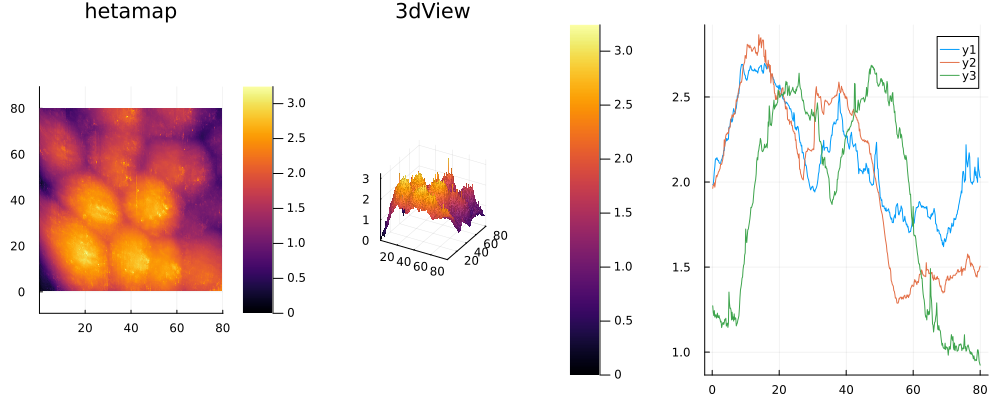

In [3]:
image = SPM.HDR.loadHDR("data/B3446.hdr")
plots = Vector{Plots.Plot}(undef, 3)
plots[1] = SPM.Plots.heatmap(image; title="hetamap")
plots[2] = SPM.Plots.plot3dView(image; title="3dView")
plots[3] = SPM.Plots.plotProfile(image, :x, 256)
SPM.Plots.plotProfile!(plots[3], image, :x, 288)
SPM.Plots.plotProfile!(plots[3], image, :y, 256)
Plots.plot(plots..., layout=(1, 3), size=(1000, 400))

# Surfaceに対する基本的な操作

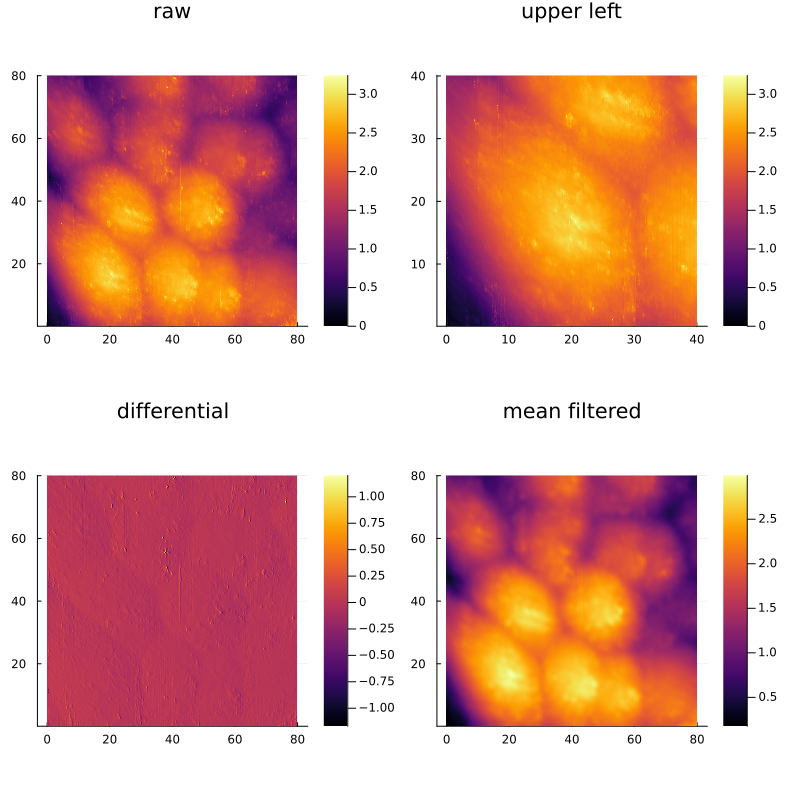

In [4]:
plots = Vector{Plots.Plot}(undef, 4)
plots[1] = SPM.Plots.heatmap(image; title="raw")
plots[2] = SPM.Plots.heatmap(SPM.extract(image, (1,1), (256,256)); title="upper left")
diff = reshape([-1, 0, 1], 1, 3)
plots[3] = SPM.Plots.heatmap(SPM.convolute(image, diff); title="differential")
mean = fill(1/121, 11, 11)
plots[4] = SPM.Plots.heatmap(SPM.convolute(image, mean); title="mean filtered")
Plots.plot(plots..., layout=(2,2), size=(800,800))

# hdrの保存

┌ Info: File already exists: data/B3446_upperleft.hdr. Overwrite.
└ @ Main.SPM.HDR /home/oishi/codes/SPM.jl/src/hdr.jl:130


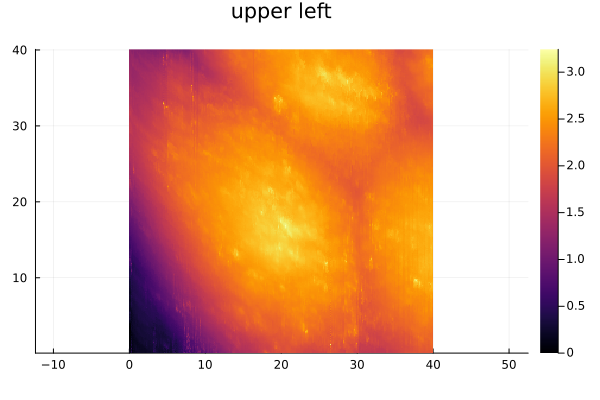

In [5]:
SPM.HDR.saveHDR(SPM.extract(image, (1,1), (256,256)), "data/B3446_lowerleft.hdr", overwrite=true; sample="lower left")
upperleft = SPM.HDR.loadHDR("data/B3446_upperleft.hdr")
SPM.Plots.heatmap(upperleft; title="upper left")

# Villarrubiaの方法による再構成(original)

In [6]:
extracted = [SPM.extract(image, (1,1), (50,50)), SPM.extract(image, (1,51), (50,50))]
Villarrubia = SPM.BTR.solveVillarrubiaBTR(extracted, 10, 0.1)

SPM.HDR.saveHDR(Villarrubia.tip, "../data/B3446_villarrubia.hdr", overwrite=true)

plots = Vector{Plots.Plot}(undef, 3)
plots[1] = SPM.Plots.heatmap(Villarrubia.tip; title="tip")
plots[2] = SPM.Plots.heatmap(extracted[1]; title="raw(1)")
plots[3] = SPM.Plots.heatmap(SPM.BTR.refineImage(extracted[1], Villarrubia.tip); title="refined(1)")
Plots.plot(plots..., layout=(1,3), size=(1000,400))


# Matsunagaの方法による再構成(differentiable)

In [ ]:
extracted = [SPM.extract(image, (1,1), (50,50)), SPM.extract(image, (1,51), (50,50))]
differentiable = SPM.BTR.solveDifferentiableBTR(extracted, 10, 500, 0.1)

SPM.HDR.saveHDR(differentiable.tip, "../data/B3446_differentiable.hdr", overwrite=true)

plots = Vector{Plots.Plot}(undef, 3)
plots[1] = SPM.Plots.heatmap(differentiable.tip; title="tip")
plots[2] = SPM.Plots.heatmap(extracted[1]; title="raw(1)")
plots[3] = SPM.Plots.heatmap(SPM.BTR.refineImage(extracted[1], differentiable.tip); title="refined(1)")
Plots.plot(plots..., layout=(1,3), size=(1000,400))